#### Logistic Regression with Python
For this lecture we will be working with the Titanic Data Set from Kaggle. This is a very famous data set and very often is a student's first step in machine learning!

We'll be trying to predict a classification- survival or deceased. Let's begin our understanding of implementing Logistic Regression in Python for classification.

We'll use a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning not shown in this lecture notebook.

### Import Libraries
Let's import some libraries to get started!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### The Data

In [2]:
train=pd.read_csv('bestsellers with categories.csv')
train.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


##### Exploratory Data Analysis
Let's begin some exploratory data analysis! We'll start by checking out missing data!

#### Missing Data
We can use seaborn to create a simple heatmap to see where we are missing data!

In [3]:
train.isnull()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
545,False,False,False,False,False,False,False
546,False,False,False,False,False,False,False
547,False,False,False,False,False,False,False
548,False,False,False,False,False,False,False


In [4]:
train.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

<AxesSubplot:>

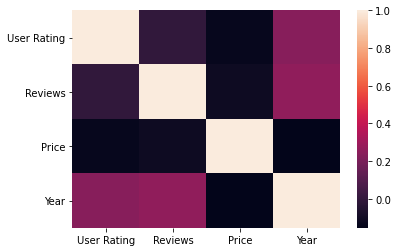

In [5]:
sns.heatmap(train.corr())

<AxesSubplot:>

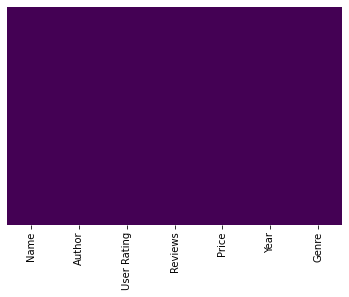

In [6]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')


<AxesSubplot:xlabel='Genre', ylabel='count'>

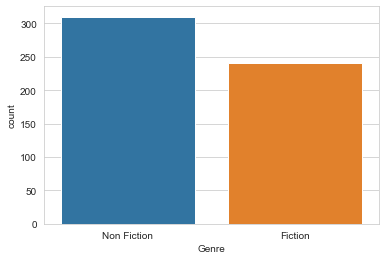

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Genre',data=train)

<AxesSubplot:xlabel='User Rating', ylabel='count'>

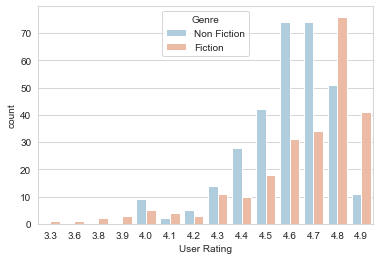

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='User Rating',hue='Genre',data=train,palette='RdBu_r')

<AxesSubplot:xlabel='Year', ylabel='count'>

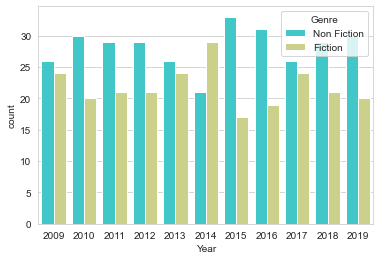

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Year',hue='Genre',data=train,palette='rainbow')

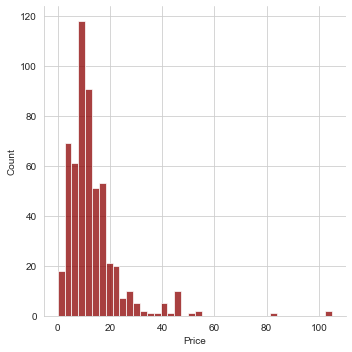

In [10]:
sns.displot(train['Price'].dropna(),kde=False,color='darkred',bins=40)

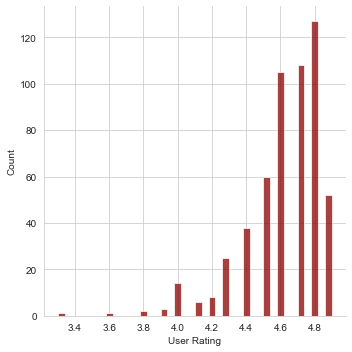

In [11]:
sns.displot(train['User Rating'].dropna(),kde=False,color='darkred',bins=40)

<AxesSubplot:>

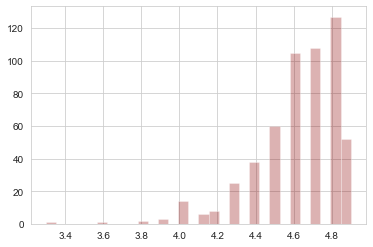

In [12]:
train['User Rating'].hist(bins=30,color='darkred',alpha=0.3)


<AxesSubplot:>

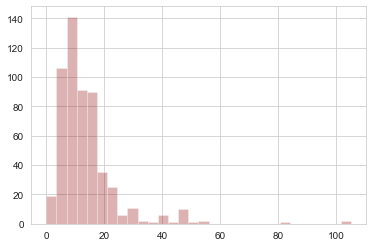

In [13]:
train['Price'].hist(bins=30,color='darkred',alpha=0.3)


<AxesSubplot:>

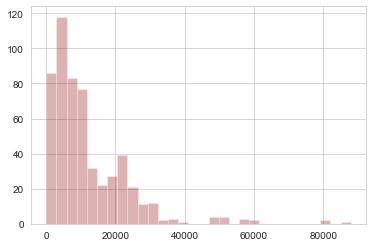

In [14]:
train['Reviews'].hist(bins=30,color='darkred',alpha=0.3)


<AxesSubplot:xlabel='Genre', ylabel='Price'>

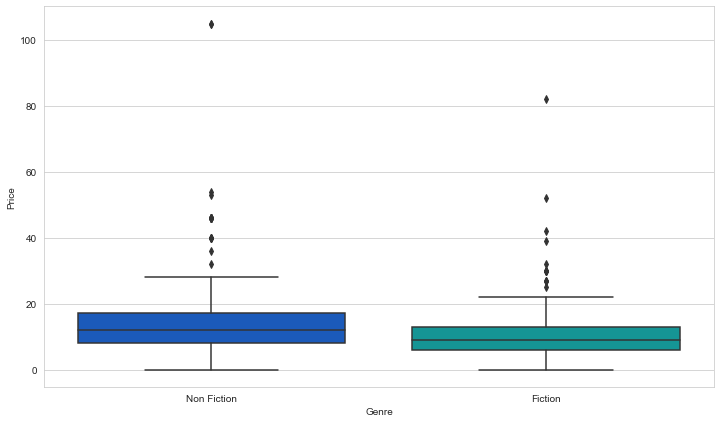

In [15]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Genre',y='Price',data=train,palette='winter')

<AxesSubplot:xlabel='Genre', ylabel='Reviews'>

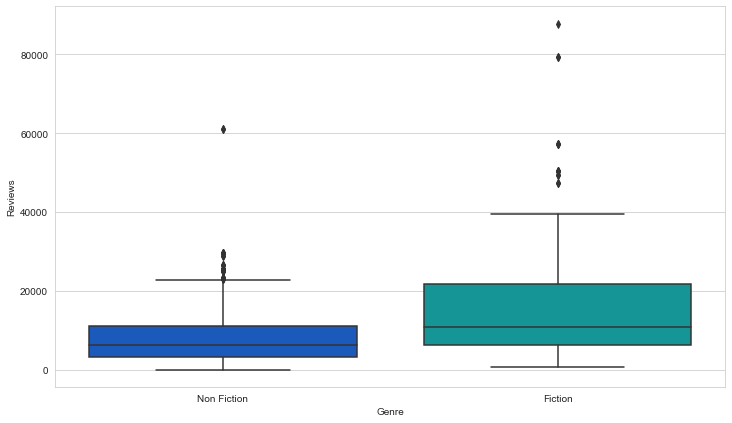

In [16]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Genre',y='Reviews',data=train,palette='winter')

In [17]:
train.drop(['Name','Author'],axis=1,inplace=True)

In [18]:
train.head()

,User Rating,Reviews,Price,Year,Genre
0,4.7,17350,8,2016,Non Fiction
1,4.6,2052,22,2011,Fiction
2,4.7,18979,15,2018,Non Fiction
3,4.7,21424,6,2017,Fiction
4,4.8,7665,12,2019,Non Fiction


In [19]:
dummies=pd.get_dummies(train['Genre'],drop_first=True).head()

In [20]:
train.head()

,User Rating,Reviews,Price,Year,Genre
0,4.7,17350,8,2016,Non Fiction
1,4.6,2052,22,2011,Fiction
2,4.7,18979,15,2018,Non Fiction
3,4.7,21424,6,2017,Fiction
4,4.8,7665,12,2019,Non Fiction


In [21]:
pd.concat([train,dummies],axis=1)

,User Rating,Reviews,Price,Year,Genre,Non Fiction
0,4.7,17350,8,2016,Non Fiction,1.0
1,4.6,2052,22,2011,Fiction,0.0
2,4.7,18979,15,2018,Non Fiction,1.0
3,4.7,21424,6,2017,Fiction,0.0
4,4.8,7665,12,2019,Non Fiction,1.0
...,...,...,...,...,...,...
545,4.9,9413,8,2019,Fiction,NaN
546,4.7,14331,8,2016,Non Fiction,NaN
547,4.7,14331,8,2017,Non Fiction,NaN
548,4.7,14331,8,2018,Non Fiction,NaN


In [22]:
train.head()

,User Rating,Reviews,Price,Year,Genre
0,4.7,17350,8,2016,Non Fiction
1,4.6,2052,22,2011,Fiction
2,4.7,18979,15,2018,Non Fiction
3,4.7,21424,6,2017,Fiction
4,4.8,7665,12,2019,Non Fiction


In [24]:
train.drop(['Genre'],axis=1)

,User Rating,Reviews,Price,Year
0,4.7,17350,8,2016
1,4.6,2052,22,2011
2,4.7,18979,15,2018
3,4.7,21424,6,2017
4,4.8,7665,12,2019
...,...,...,...,...
545,4.9,9413,8,2019
546,4.7,14331,8,2016
547,4.7,14331,8,2017
548,4.7,14331,8,2018


In [25]:
train.head()

,User Rating,Reviews,Price,Year,Genre
0,4.7,17350,8,2016,Non Fiction
1,4.6,2052,22,2011,Fiction
2,4.7,18979,15,2018,Non Fiction
3,4.7,21424,6,2017,Fiction
4,4.8,7665,12,2019,Non Fiction
